# Equations différentielles en python


## Sommaire:

1. Résoudre une équation différentielle d'ordre 1
    - Exemple 1
        - Graphiquement ( Aussi dit "Numériquement").
        - Symboliquement.
    - Exemple 2
        - Graphiquement ( Aussi dit "Numériquement").
        - Symboliquement.      
    - Un cas concret.

2. Résoudre numériquement une Eq Diff exprimée symboliquement
    - La méthode avec lambdify
    - https://docs.sympy.org/latest/guides/solving/solve-ode.html

3. Résoudre une équation différentielle d'ordre 2
    - Exemple 1
        - Graphiquement ( Aussi dit "Numériquement").
        - Symboliquement.
    - Exemple 2
        - Graphiquement ( Aussi dit "Numériquement").
        - Symboliquement.  

## Exemple 1

In [168]:
# Import des libs
from scipy import *
from scipy.integrate import odeint #Pour résoudre l’équation différentielle
import matplotlib.pyplot as plt # Permet de tracer des graphes
import numpy as np
from math import *

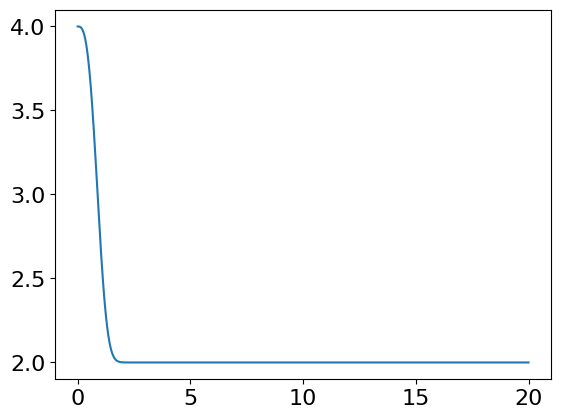

In [169]:

# Equation
def deriv (y,x) :
    # return y * sin( y ) + sin( x )
    return 6*x**2 - 3*x**2 * y

# Choix de l’ intervalle d’intégration
x0 = 0
xmax = 20
npoints = 1000
x = np.linspace ( x0 , xmax , npoints )

# Condition initiale
y0 = 4 # y(x0) = y0

solution = odeint ( deriv , y0 , x )
y = solution [ : , 0 ]

plt.plot ( x , y )
plt.show ( )

## Symboliquement

Le problème de Cauchy:
\begin{cases}
u'(x)=-3x^2u(x)+6x^2,\\
u(0)=4.
\end{cases}

## Etape 1 : Entrer l'EDO avec Sympy

In [170]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
u   = sympy.Function('u')

left  = sympy.diff(u(x),x)

right = 6*x**2 - 3*x**2 * u(x)

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(u(x), x), -3*x**2*u(x) + 6*x**2)

## Etape 2 : Afficher la solution générale

In [171]:
solgen = sympy.dsolve(edo,u(x)) 
display(solgen)

Eq(u(x), C1*exp(-x**3) + 2)

## Etape 3 : Prendre en compte les conditions initiale

In [172]:
x0 = 0
u0 = 4
consts = sympy.solve( sympy.Eq( u0, solgen.rhs.subs(x,x0)) , dict=True)[0]
consts

{C1: 2}

## Etape 4 : Solution avec les conditions initiales

In [173]:
solpar = solgen.subs(consts)
solpar

Eq(u(x), 2 + 2*exp(-x**3))

## Etape 5 : Solution graphique

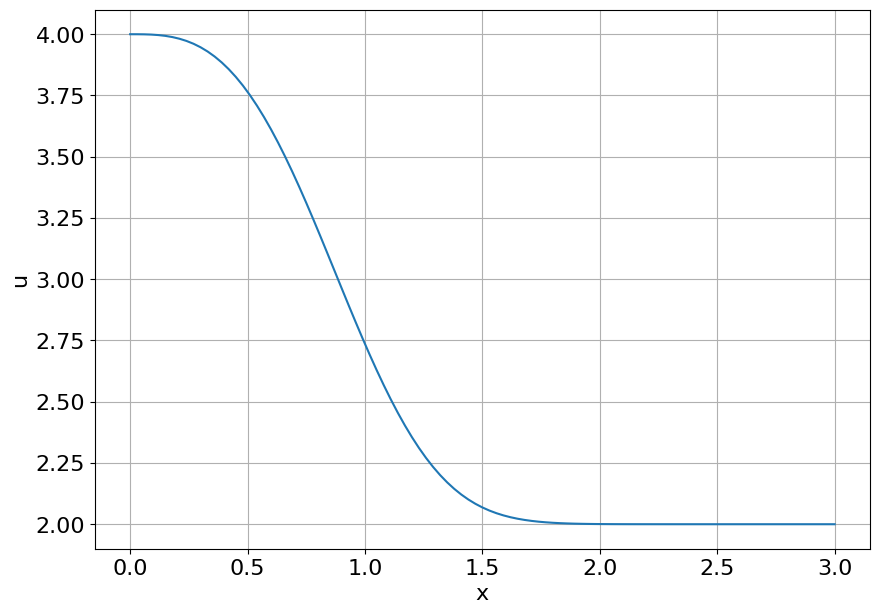

In [174]:
func = sympy.lambdify(x,solpar.rhs,'numpy')
from matplotlib.pylab import *
# rcdefaults()
rcParams.update({'font.size': 16})
figure(figsize=(10,7))
xx=linspace(0,3,101)
yy=func(xx)
plot(xx,yy)
xlabel('x')
ylabel('u')
grid()

## Exemple 2

\begin{cases}
t'(x)=sin(t) * sin(x)

\end{cases}

 ## Graphiquement

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

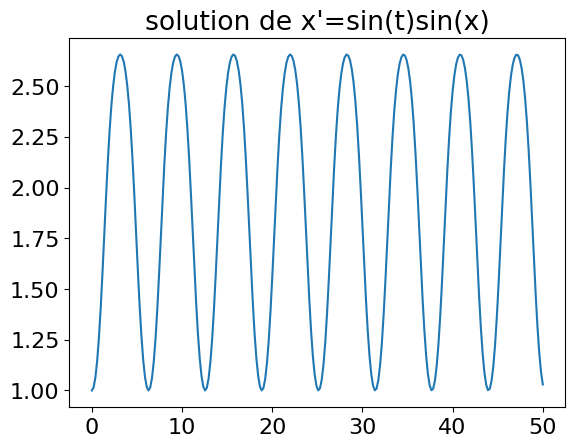

In [176]:
def f(x, t):
    return np.sin(t) * np.sin(x)
t = np.linspace(0, 50, 256)
x = odeint(f, 1, t)
plt.plot(t, x)
plt.title("solution de x'=sin(t)sin(x)")
plt.show()

## Symboliquement

In [177]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x
import sympy

x   = sympy.Symbol('x')
y   = sympy.Function('y')

left  = sympy.diff(y(x),x) # Partie gauche, avec la dérivée

right = sympy.sin(y(x)) * sympy.sin(x) # Partie droite, avec les sin et cos qui fonctionnent.

edo = sympy.Eq( left , right )
display(edo)

Eq(Derivative(y(x), x), sin(x)*sin(y(x)))